<a href="https://colab.research.google.com/github/antonvandike/Algoritmos-Geneticos/blob/main/Algoritmo%20genetico%20(primeros%20intentos)/algoritmo_ejemplo_comentado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerias a usar

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def _fitness(x):
    #x = np.array(x)
    if x > -11 and x < 11:
        y = (x**2+x)*np.cos(2*x) + x**2
        return y
    else:
        return 0

In [ ]:
def _get_fittest_parent(parents, fitness):
  print('entra a get_fittest_parent\n')

  print('evaluacion de los individuos en la funcion objetivo')
  _1fitness = fitness(parents)
  print(_1fitness,'\n\n')

  print('Cantidades por pares ordenados')
  PFitness = list(zip(parents, _1fitness))
  print( PFitness,'\n\n')

  PFitness.sort(key = lambda x: x[1], reverse=True)

  print('ordenar de mayor a menor, con respecto a su calificacion')
  print(PFitness,'\n\n')

  print('El mejor individuo')
  best_parent, best_fitness = PFitness[0]
  print(best_parent, best_fitness)
  print('\nsale get_fittest_parent\n\n')
  return(round(best_parent, 4), round(best_fitness, 4))

In [ ]:
def _mutate(parents, fitness_function):
  print('entra a funcion _mutate\n\n')

  print('numero de individuos')
  n = int(len(parents))
  print(n,'\n\n')

  print('calificacion (evaluacion) de los individuos')
  scores = fitness_function(parents)
  print(scores,'\n\n')

  print('Solo valores positivos')
  idx = scores > 0 ## positive values only
  print(idx,'\n\n')

  print('lista con solo los valores positivos')
  scores = scores[idx]
  print(scores,'\n\n')

  print('Individuos con valores positivos')
  parents = np.array(parents)[idx]
  print(parents,'\n\n')

  ## resample parents with probabilities proportional to fitness
  ## then, add some noise for 'random' mutation

  print('Seleccionar en base a su calificacion 10 individuos de los')
  print('valores solo positivos ya seleccionado ')
  children = np.random.choice(parents, size=n, p = scores / scores.sum())
  print(children,'\n\n')

  print('Agregar un poco de ruido, para mutar los individuos')
  children = children + np.random.uniform(-0.51,0.51, size=n)  # add some noise to mutate
  print(children,'\n')

  print('Sale de funcion _mutate\n\n')
  return children.tolist() ## convert array to list

In [ ]:
# mutate_fn no aporta
#def find_best_fit(parents, fitness_function, mutate_fn, popsize = 100, max_iter = 100):

def find_best_fit(parents, fitness_function , popsize = 100, max_iter = 100):
  History = []
  print('History',History)

  ## initial parents; gen zero
  #best_parent, best_fitness = _get_fittest_parent(parents, fitness)
  # fitness no aporta
  print('Poblacion incial','funcion')
  print(parents, fitness_function,'\n\n')



  best_parent, best_fitness = _get_fittest_parent(parents, fitness_function)

  print('\n\nmejor individuo, mejor calificacion')
  print(best_parent, best_fitness)

  # first plot the initial parents
  x = np.linspace(start=-20, stop=20, num=200) ## population range
  plt.plot(x, fitness_function(x))
  plt.scatter(parents, fitness_function(parents), marker= 'x',c='red')
  plt.scatter(best_parent, best_fitness, marker= 'x',c='green')
  plt.show()
  print('\n\n')
  ## next generation
  #for i in range(1, max_iter + 1):

  parents = _mutate(parents, fitness_function=fitness_function)

  print('nueva generarion, con individuos mejores y mutada')
  print(parents,'\n\n')


  curr_parent, curr_fitness = _get_fittest_parent(parents, fitness_function)

  #ax = plt.scatter(parents, fitness(parents))
  #plt.pause(0.09)
  print('comparacion con el mejor invidudo de la generacion anterior')
  print(best_parent, best_fitness)
  if curr_fitness > best_fitness:
    best_fitness = curr_fitness
    best_parent = curr_parent
  print(best_parent, best_fitness,'\n\n')

  curr_parent, curr_fitness = _get_fittest_parent(parents, fitness_function)
  print(curr_parent, curr_fitness)
  print('generation {}| best fitness {}| current fitness {} | current_parent {}'.format(1, best_fitness, curr_fitness, curr_parent))
  #History.append((i, np.max(fitness_function(parents))))

  #ax.remove() ## remove points



  print(best_parent, best_fitness)
  #plt.scatter(parents, fitness_function(parents))
  #plt.scatter(best_parent, fitness_function(best_parent), marker = '.', c = 'b', s = 100)
  #plt.pause(0.09)
  #plt.ioff()
  ## return best parents
  print('STOP generation {}| best fitness {}| best_parent {}'.format(1, best_fitness, best_parent))

  #import time
  #time.sleep(5)

  #return best_parent, best_fitness, History
  return

History []
Poblacion incial funcion
[-20.         -15.55555556 -11.11111111  -6.66666667  -2.22222222
   2.22222222   6.66666667  11.11111111  15.55555556  20.        ] <numpy.vectorize object at 0x7ab3681b6830> 


entra a get_fittest_parent

evaluacion de los individuos en la funcion objetivo
[ 0  0  0 71  4  3 81  0  0  0] 


Cantidades por pares ordenados
[(-20.0, 0), (-15.555555555555555, 0), (-11.11111111111111, 0), (-6.666666666666666, 71), (-2.2222222222222214, 4), (2.2222222222222214, 3), (6.666666666666668, 81), (11.111111111111114, 0), (15.555555555555557, 0), (20.0, 0)] 


ordenar de mayor a menor, con respecto a su calificacion
[(6.666666666666668, 81), (-6.666666666666666, 71), (-2.2222222222222214, 4), (2.2222222222222214, 3), (-20.0, 0), (-15.555555555555555, 0), (-11.11111111111111, 0), (11.111111111111114, 0), (15.555555555555557, 0), (20.0, 0)] 


El mejor individuo
6.666666666666668 81

sale get_fittest_parent




mejor individuo, mejor calificacion
6.6667 81


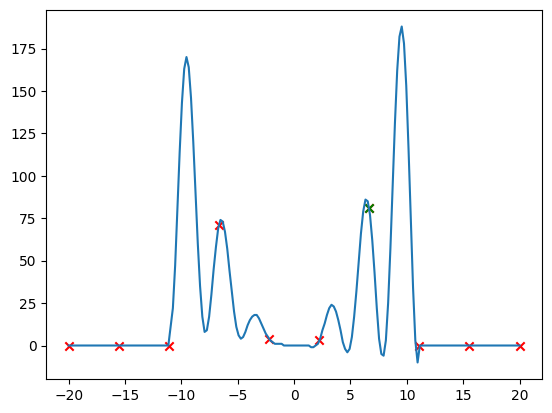




entra a funcion _mutate


numero de individuos
10 


calificacion (evaluacion) de los individuos
[ 0  0  0 71  4  3 81  0  0  0] 


Solo valores positivos
[False False False  True  True  True  True False False False] 


lista con solo los valores positivos
[71  4  3 81] 


Individuos con valores positivos
[-6.66666667 -2.22222222  2.22222222  6.66666667] 


Seleccionar en base a su calificacion 10 individuos de los
valores solo positivos ya seleccionado 
[ 6.66666667 -6.66666667 -6.66666667 -6.66666667  6.66666667 -6.66666667
 -6.66666667 -2.22222222  6.66666667  6.66666667] 


Agregar un poco de ruido, para mutar los individuos
[ 6.63634372 -6.29874039 -6.24480059 -6.87047989  6.16172865 -6.62956386
 -6.29698736 -2.12045966  6.47629607  6.45957839] 

Sale de funcion _mutate


nueva generarion, con individuos mejores y mutada
[6.636343715002137, -6.298740387794945, -6.244800590129101, -6.870479891134584, 6.161728645174069, -6.629563859308662, -6.296987362363659, -2.120459656086661, 

In [ ]:
fitness = np.vectorize(_fitness)
plt.ion()
init_pop = np.linspace(start=-20, stop=20, num=10) ## population range
find_best_fit(init_pop, fitness)
#print('top parent {}, top fitness {}'.format(parent_, fitness_))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def _fitness(x):
    #x = np.array(x)
    if x > -11 and x < 11:
        y = (x**2+x)*np.cos(2*x) + x**2
        return round(y, 6)
    else:
        return 0


fitness = np.vectorize(_fitness)



def _get_fittest_parent(parents, fitness):
    _fitness = fitness(parents)
    PFitness = list(zip(parents, _fitness))
    PFitness.sort(key = lambda x: x[1], reverse=True)
    best_parent, best_fitness = PFitness[0]
    return round(best_parent, 4), round(best_fitness, 4)


def _mutate(parents, fitness_function):
    n = int(len(parents))
    scores = fitness_function(parents)
    idx = scores > 0 ## positive values only
    scores = scores[idx]
    parents = np.array(parents)[idx]
    ## resample parents with probabilities proportional to fitness
    ## then, add some noise for 'random' mutation
    children = np.random.choice(parents, size=n, p = scores / scores.sum())
    children = children + np.random.uniform(-0.51,0.51, size=n)  # add some noise to mutate
    return children.tolist() ## convert array to list



def find_best_fit(parents, fitness_function, mutate_fn, popsize = 100, max_iter = 100):
    History = []
    ## initial parents; gen zero
    best_parent, best_fitness = _get_fittest_parent(parents, fitness)

    # first plot the initial parents
    x = np.linspace(start=-20, stop=20, num=200) ## population range
    plt.plot(x, fitness_function(x))
    plt.scatter(parents, fitness_function(parents), marker= 'x')

    ## next generation
    for i in range(1, max_iter + 1):
        parents = _mutate(parents, fitness_function=fitness_function)

        curr_parent, curr_fitness = _get_fittest_parent(parents, fitness_function)

        ax = plt.scatter(parents, fitness(parents))
        plt.pause(0.09)
        if curr_fitness > best_fitness:
            best_fitness = curr_fitness
            best_parent = curr_parent

        curr_parent, curr_fitness = _get_fittest_parent(parents, fitness_function)
        print('generation {}| best fitness {}| current fitness {} | current_parent {}'.format(i, best_fitness, curr_fitness, curr_parent))
        History.append((i, np.max(fitness_function(parents))))

        ax.remove() ## remove points


    print(best_parent, best_fitness)
    plt.scatter(parents, fitness_function(parents))
    plt.scatter(best_parent, fitness_function(best_parent), marker = '.', c = 'b', s = 100)
    plt.pause(0.09)
    plt.ioff()
    ## return best parents
    print('STOP generation {}| best fitness {}| best_parent {}'.format(i, best_fitness, best_parent))

    import time
    time.sleep(5)

    return best_parent, best_fitness, History





if __name__ == '__main__':
    plt.ion()
    init_pop = np.linspace(start=-20, stop=20, num=200) ## population range
    parent_, fitness_, history_ = find_best_fit(init_pop, fitness,  _mutate)
    print('top parent {}, top fitness {}'.format(parent_, fitness_))